# Auto Generated Agent Chat: GPTAssistant with Code Interpreter
The latest released Assistants API by OpenAI allows users to build AI assistants within their own applications. The Assistants API currently supports three types of tools: Code Interpreter, Retrieval, and Function calling. In this notebook, we demonstrate how to enable `GPTAssistantAgent` to use code interpreter. 

## Requirements

AutoGen requires `Python>=3.8`. To run this notebook example, please install:
````{=mdx}
:::info Requirements
Install `autogen-agentchat`:
```bash
pip install autogen-agentchat~=0.2
```

For more information, please refer to the [installation guide](/docs/installation/).
:::
````

## Set your API Endpoint

The [`config_list_from_json`](https://microsoft.github.io/autogen/docs/reference/oai/openai_utils#config_list_from_json) function loads a list of configurations from an environment variable or a json file.

In [1]:
import io

from IPython.display import display
from PIL import Image

import autogen
from autogen.agentchat import AssistantAgent, UserProxyAgent
from autogen.agentchat.contrib.gpt_assistant_agent import GPTAssistantAgent

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    file_location=".",
    filter_dict={
        "model": ["gpt-3.5-turbo", "gpt-35-turbo", "gpt-4", "gpt4", "gpt-4-32k", "gpt-4-turbo"],
    },
)

````{=mdx}
:::tip
Learn more about configuring LLMs for agents [here](/docs/topics/llm_configuration).
:::
````

## Perform Tasks Using Code Interpreter

We demonstrate task solving using `GPTAssistantAgent` with code interpreter. Pass `code_interpreter` in `tools` parameter to enable `GPTAssistantAgent` with code interpreter. It will write code and automatically execute it in a sandbox. The agent will receive the results from the sandbox environment and act accordingly.

### Example 1: Math Problem Solving
In this example, we demonstrate how to use code interpreter to solve math problems.


In [2]:
# Initiate an agent equipped with code interpreter
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "config_list": config_list,
    },
    assistant_config={
        "tools": [{"type": "code_interpreter"}],
    },
    instructions="You are an expert at solving math questions. Write code and run it to solve math problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy = UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    },
    human_input_mode="NEVER",
)

# When all is set, initiate the chat.
user_proxy.initiate_chat(
    gpt_assistant, message="If $725x + 727y = 1500$ and $729x+ 731y = 1508$, what is the value of $x - y$ ?"
)
gpt_assistant.delete_assistant()

OpenAI client config of GPTAssistantAgent(Coder Assistant) - model: gpt-4-turbo
Matching assistant found, using the first matching assistant: {'id': 'asst_xBMxObFj0TzDex04NAKbBCmP', 'created_at': 1710321320, 'description': None, 'file_ids': [], 'instructions': 'You are an expert at solving math questions. Write code and run it to solve math problems. Reply TERMINATE when the task is solved and there is no problem.', 'metadata': {}, 'model': 'gpt-4-turbo', 'name': 'Coder Assistant', 'object': 'assistant', 'tools': [ToolCodeInterpreter(type='code_interpreter')]}


user_proxy (to Coder Assistant):

If $725x + 727y = 1500$ and $729x+ 731y = 1508$, what is the value of $x - y$ ?

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

The value of \( x - y \) is \(-48\).


--------------------------------------------------------------------------------
user_proxy (to Coder Assistant):



--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

It seems you have no further inquiries. If you have more questions in the future, feel free to ask. Goodbye!

TERMINATE


--------------------------------------------------------------------------------


Permanently deleting assistant...


### Example 2: Plotting with Code Interpreter

Code Interpreter can outputs files, such as generating image diagrams. In this example, we demonstrate how to draw figures and download it.

In [8]:
gpt_assistant = GPTAssistantAgent(
    name="Coder Assistant",
    llm_config={
        "config_list": config_list,
    },
    assistant_config={
        "tools": [{"type": "code_interpreter"}],
    },
    instructions="You are an expert at writing python code to solve problems. Reply TERMINATE when the task is solved and there is no problem.",
)

user_proxy.initiate_chat(
    gpt_assistant,
    message="Draw a line chart to show the population trend in US. Show how you solved it with code.",
    is_termination_msg=lambda msg: "TERMINATE" in msg["content"],
    human_input_mode="NEVER",
    clear_history=True,
    max_consecutive_auto_reply=1,
)

OpenAI client config of GPTAssistantAgent(Coder Assistant) - model: gpt-4-turbo
No matching assistant found, creating a new assistant


user_proxy (to Coder Assistant):

Draw a line chart to show the population trend in US. Show how you solved it with code.

--------------------------------------------------------------------------------
Coder Assistant (to user_proxy):

To draw a line chart showing the population trend in the US, we first need to obtain the data that contains the population figures over a range of years. As I don't have access to the internet in this environment, I cannot download the data directly. However, if you can provide the data, I can proceed to create a line chart for you.

For the purpose of this demonstration, let's assume we have some hypothetical US population data for a few years. I'll generate some sample data and create a line chart using the `matplotlib` library in Python.

Here's how we can do it:


Received file id=assistant-tvLtfOn6uAJ9kxmnxgK2OXID

Here is a line chart that illustrates the hypothetical US population trend from 2010 to 2020. The data used here is for demonstration 

ChatResult(chat_id=None, chat_history=[{'content': 'Draw a line chart to show the population trend in US. Show how you solved it with code.', 'role': 'assistant'}, {'content': "To draw a line chart showing the population trend in the US, we first need to obtain the data that contains the population figures over a range of years. As I don't have access to the internet in this environment, I cannot download the data directly. However, if you can provide the data, I can proceed to create a line chart for you.\n\nFor the purpose of this demonstration, let's assume we have some hypothetical US population data for a few years. I'll generate some sample data and create a line chart using the `matplotlib` library in Python.\n\nHere's how we can do it:\n\n\nReceived file id=assistant-tvLtfOn6uAJ9kxmnxgK2OXID\n\nHere is a line chart that illustrates the hypothetical US population trend from 2010 to 2020. The data used here is for demonstration purposes only. If you have actual population data, y

Now we have the file id. We can download and display it.

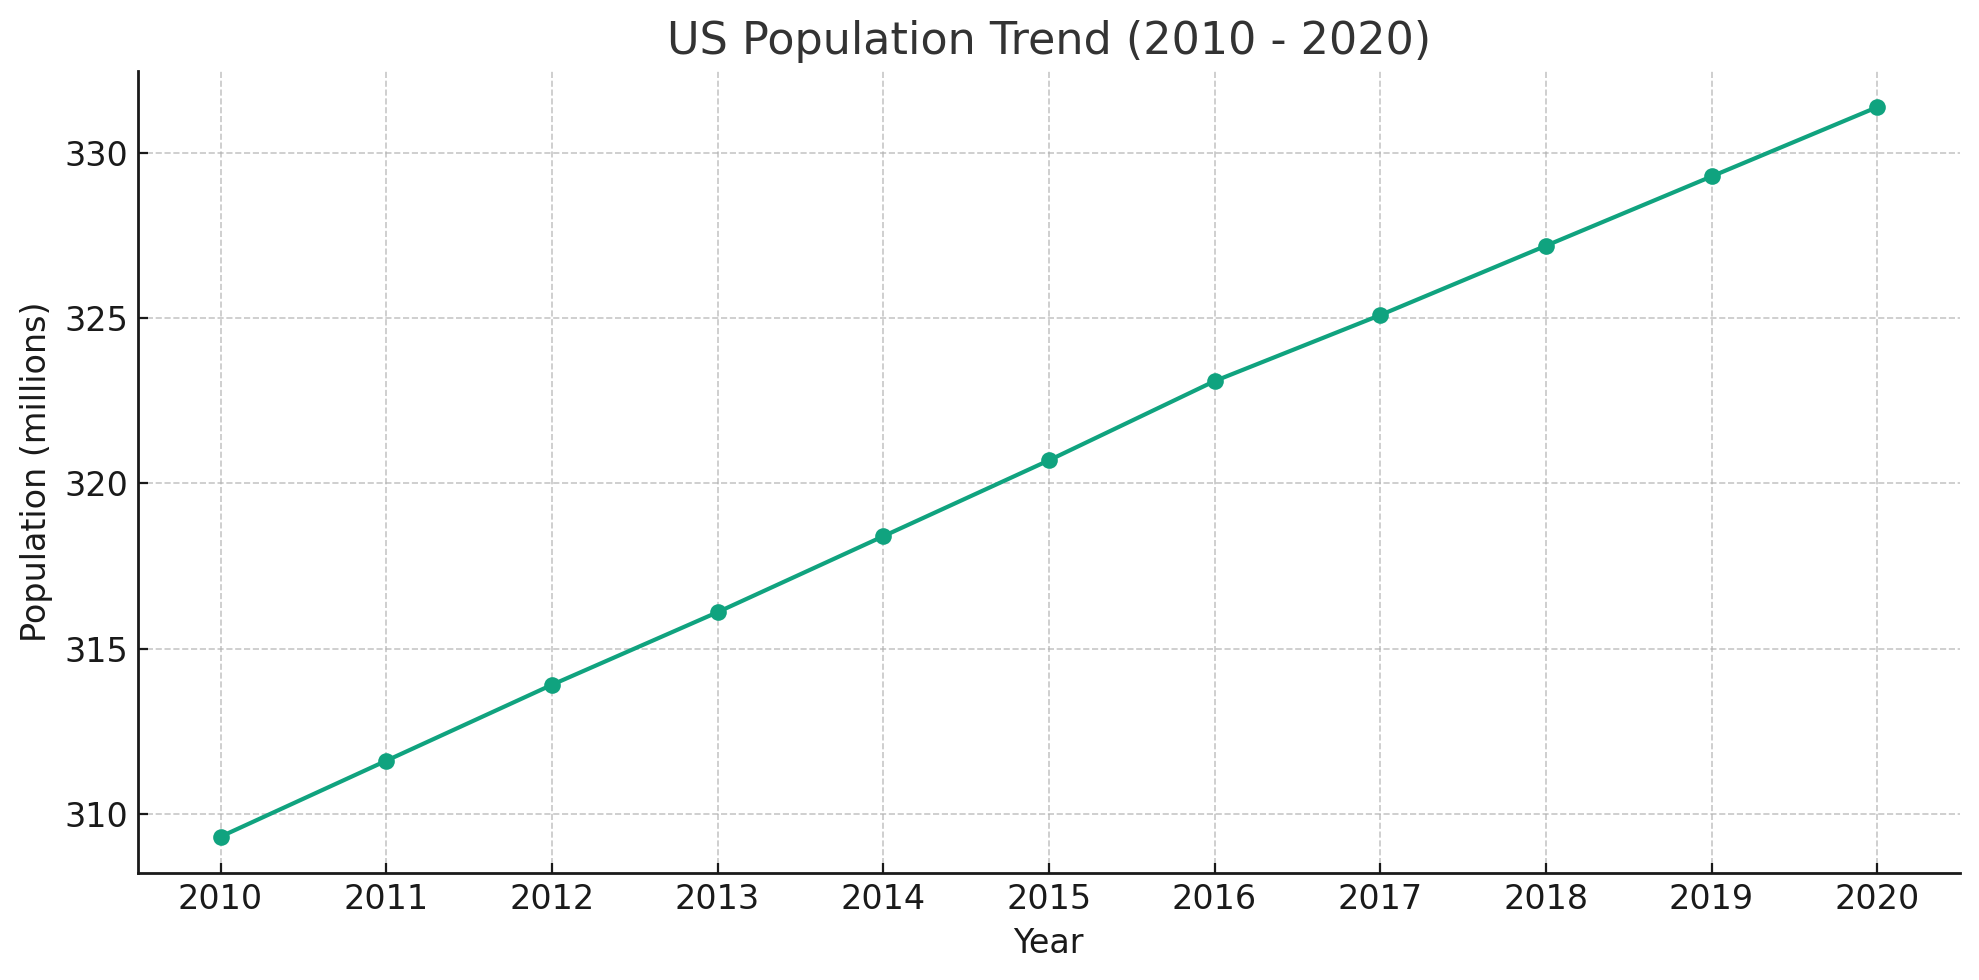

In [9]:
api_response = gpt_assistant.openai_client.files.with_raw_response.retrieve_content(
    "assistant-tvLtfOn6uAJ9kxmnxgK2OXID"
)

if api_response.status_code == 200:
    content = api_response.content
    image_data_bytes = io.BytesIO(content)
    image = Image.open(image_data_bytes)
    display(image)

In [10]:
gpt_assistant.delete_assistant()

Permanently deleting assistant...
